In [1]:
#gaussian mixture

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

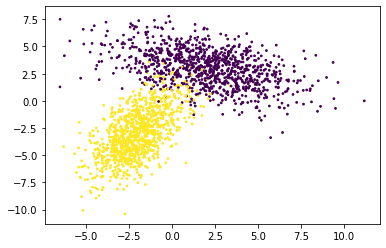

In [27]:
num_points = 1000

mean_1 = [2, 3]
cov_1 = [[7, -2], [-2, 3]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [-2, -3]
cov_2 = [2, 2], [2, 5]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

In [28]:
GMM = GaussianMixture(n_components=2, covariance_type='full') #любая форма кластера(не обязательно одинаковые аля Tied)
GMM.fit(X)
print('means ')  #центры точек
print(GMM.means_)
print('covariances ')  #разброс
print(GMM.covariances_)
print('weights ')  #вес точек, Распределение всех точек по классам 
print(GMM.weights_)

means 
[[ 1.96081785  2.94292983]
 [-2.11250776 -3.12229716]]
covariances 
[[[ 7.16776838 -1.93512845]
  [-1.93512845  2.94778883]]

 [[ 1.77806546  1.59443611]
  [ 1.59443611  4.62331891]]]
weights 
[0.51911432 0.48088568]


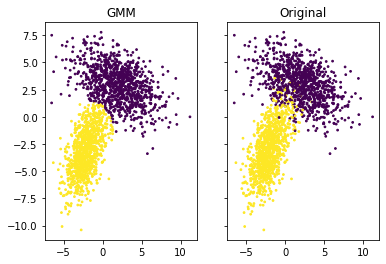

In [29]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)